# Introduction

This notebook aims to predict **UCity**, which is an unadjusted City MPG. City MPG (Miles Per Gallon) refers to driving with occasional stopping and braking, simulating the conditions one may run into while driving on city streets. The notebook uses the given dataset, which concerns the fuel economy and car information for the 1984-2019 model year vehicles. 

In the first part of the notebook, you will gain insights into the data set. The second part of the notebook introduces the model that predicts **UCity**.


# Data Cleaning

Basic cleaning tasks, such as identifying Nulls and outliers, have been performed as stated below:

- Identifying two types of Null (null and 0) in dataset and cleaning the data
- Replacing -1 with Null for specific columns, including **co2**, **co2TailpipeGpm**, **feScore**, **ghgScore**
- Removing columns containing more than 80% Null 
- Removing columns containing information on dual fuel cars (name contains A) as the small amount of data will bring the bias into the model. In dual fuel cars, only conventional fuel data was taken into consideration.
- Creating a new variable called **type** that contains information on the types of cars: **single_fuel** and **dual_fuel**


In [29]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# read data
df=pd.read_csv("vehicles.csv")

# added variable type
df['type'] = np.where(df['fuelType2'].isnull(), 'single_fuel', 'dual_fuel')

#remove columns for dual fuel cars
df2 = df.filter(regex ='A')
columns=df2.columns
df=df.drop(columns=columns)

#replace 0 with nan
df=df.replace({'0': np.nan, 0: np.nan})

#remove column contain 80% null
df=df[df.columns[df.isnull().mean() < 0.8]]

#replace -1 with Null
cols_co2=["co2","co2TailpipeGpm","feScore","ghgScore"]
df[cols_co2]=df[cols_co2].replace({-1:np.nan})


df_copy=df.copy()

print('MPG file has {} rows and {} columns'.format(df.shape[0], df.shape[1]))
print("Number of unique rows", df['id'].unique().shape[0])
print("Number of NULL in UCity", df['UCity'].isna().sum())

#df.columns

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (73,74,76) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


MPG file has 40081 rows and 37 columns
Number of unique rows 40081
Number of NULL in UCity 25


# Explanatory Data Analysis (EDA)

This section poses questions to develop insight into UCity and other variables presented in the dataset.

## What is the difference between the two types of cars in terms of UCity?

As you can see, the distributions of City MPG (UCity) for dual and single fuel cars are very different. As the above plot demonstrates, single fuel cars are more efficient since they have bigger City MPG (UCity).

,mean_Ucity,median_Ucity,max_Ucity,min_Ucity
type,,,,
dual_fuel,21.059722,19.1,78.8197,11.6655
single_fuel,23.057282,21.4,197.5771,7.0000


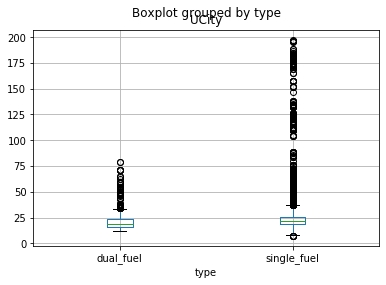

In [26]:
df.boxplot(column='UCity',by='type')
df.groupby(["type"]).agg(mean_Ucity=("UCity","mean"),
                         median_Ucity=("UCity","median"),
                         max_Ucity=("UCity",max),
                         min_Ucity=("UCity",min))

## Which manufacturer produces the most fuel-efficient fleet of cars?

For all vehicles, the dataset shows City, Highway, and Combined MPG values. As a weighted average of City and Highway MPG values, the Combined MPG value seems to be the most reliable for a quick comparison across vehicles. 

Based on this assumption, I choose **comb08** and use the mean to find the manufacturer that produces the most fuel-efficient fleet of cars. Among all manufacturers, Tesla with the mean Combined MPG of 96.74 is the best manufacturer in terms of fuel efficiency.

To examine **UCity**, the same calculation for UCity produces the same result. Tesla with the mean City MPG of 127.505 is the best manufacturer that produces the most fuel-efficient fleet of cars.




In [27]:
EDA=df.groupby(["make"]).agg(mean_comb=("comb08","mean")).sort_values("mean_comb", ascending=False)[:1]
EDA

EDA_1=df.groupby(["make"]).agg(mean_ucity=("UCity","mean")).sort_values("mean_ucity", ascending=False)[:1]
EDA_1

,mean_ucity
make,
Tesla,127.505172


## Which cars are the best and worst in terms of petroleum consumption?

To assess petroleum consumption, I focus on annual petroleum consumption in barrels (barrels08). Honda (Civic Natural Gas) with a mean of 0.06 annual petroleum consumption in barrels presents the lowest mean of annual petroleum consumption in barrels among all the cars. In contrast, Lamborghini (Countach) with a mean of 47.08 annual petroleum consumption in barrels has the highest mean of annual petroleum consumption in barrels.

In [28]:
EDA1=df.groupby(["make","model"]).agg(mean_barrels=("barrels08","mean")).sort_values("mean_barrels")[:1]
EDA1

EDA2=df.groupby(["make","model"]).agg(mean_barrels=("barrels08","mean")).sort_values("mean_barrels", ascending=False)[:1]
EDA2

,,mean_barrels
make,model,
Lamborghini,Countach,47.087143


# How has fuel economy changed over time?

As you can see Combined and City MPG have a sharp increase starting in 2007.This sharp increase might be explained by the EPA explanation. As the EPA guideline states, "the MPG estimates for all 1985-2007 model year vehicles and some 2011-2016 model year vehicles have been updated. The 2017 change updates some of the calculations used to estimate fuel economy. The new calculations are based on test data from the model year 2011–2016 vehicles. So, they better reflect today's vehicle fleet of more fuel-efficient vehicles and advanced technologies such as hybrids and turbocharged engines. Most vehicles are not affected by the new calculations. Some fuel economy estimates will decrease by 1 mpg, and a small number may be 2 mpg lower." 

It might be also resulted from technological innovation in the automobile industry between 2007 and 2016 that led to a wide array of technology available to manufacturers to achieve the best fuel economy. Thus, the manufacturers have produced cars with higher Combined MPG to have the best fuel economy. Since 2016, this trend stopped and slightly reversed.


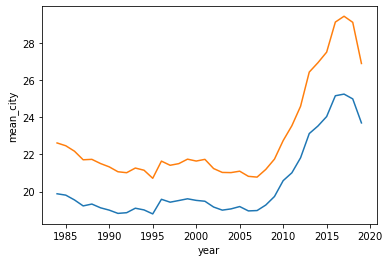

In [341]:
EDA3=df.groupby(["year"]).agg(mean_comb=("comb08","mean"))
EDA3=EDA3.reset_index()
EDA3_1=df.groupby(["year"]).agg(mean_city=("UCity","mean"))
EDA3_1=EDA3_1.reset_index()

sns.lineplot(x="year", y="mean_comb", data=EDA3)
sns.lineplot(x="year", y="mean_city", data=EDA3_1)

## What is the link between tailpipe CO2/GHG and UCity?
The amount of CO2 is directly related to City MPG (UCity). According to the plot above, there is a negative relationship between the tailpipe CO2 and City MPG; when a car has a higher City MPG, it produces less tailpipe CO2. This also shows a close correlation between EPA GHG score and City MPG, meaning that vehicles with higher city MPG (UCity) have higher EPA GHG scores.




<Figure size 432x288 with 0 Axes>

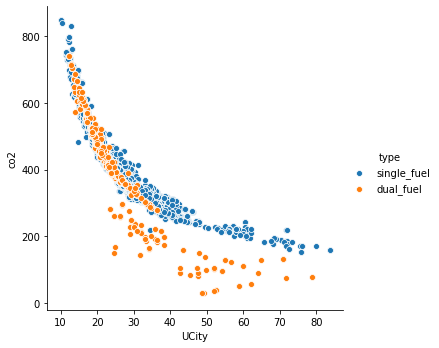

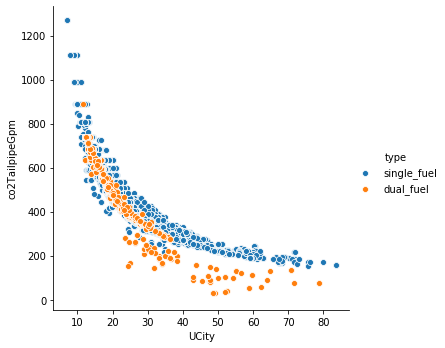

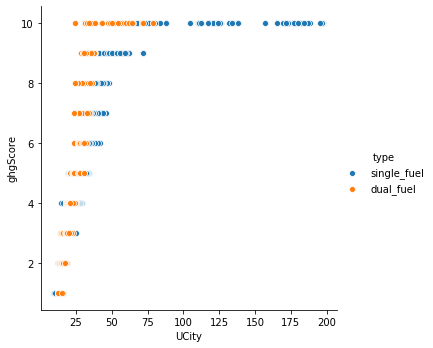

In [312]:
plt.figure()
sns.pairplot(x_vars=["UCity"], y_vars=["co2"], data=df,hue="type" , size=5)
sns.pairplot(x_vars=["UCity"], y_vars=["co2TailpipeGpm"], data=df,hue="type" , size=5)
sns.pairplot(x_vars=["UCity"], y_vars=["ghgScore"], data=df,hue="type" , size=5)

# How has fuel price changed over time?

As you can see below, despite all the ups and downs of the fuel price over the past years, the market experienced a sharp decrease in price from 2007 to 2016 while this trend slightly reversed since 2016 when we see a slight growth in fuel price between 2016 and 2019. While these fluctuations might have resulted from the change in oil prices in different time periods, one should not underestimate the impact of new technologies, such as the introduction of electric cars on the fuel market. 

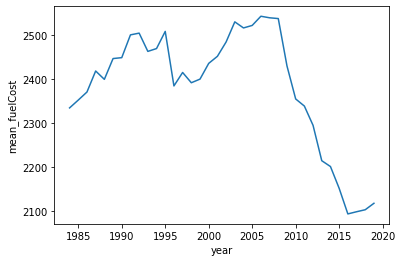

In [4]:
EDA4=df.groupby(["year"]).agg(mean_fuelCost=("fuelCost08","mean"))
EDA4=EDA4.reset_index()


sns.lineplot(x="year", y="mean_fuelCost", data=EDA4)

# How has City MPG (UCity) changed over time within each fuel type?

As you can see from this graph, electric cars have a significantly higher City MPG over time since their introduction to the market in 1998. In contrast, the City MPG of diesel cars is decreasing slightly during the same period.

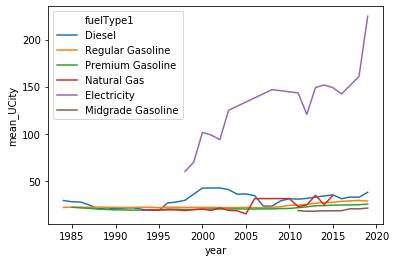

In [349]:
EDA5=df.groupby(["year","fuelType1"]).agg(mean_UCity=("UCity","mean"))
EDA5=EDA4.reset_index()

sns.lineplot(x="year", y="mean_UCity", hue='fuelType1', data=EDA5)

# Which fuel type produces more CO2?

Midgrade Gasoline produces more tailpipe CO2 compared to other types of fuels.

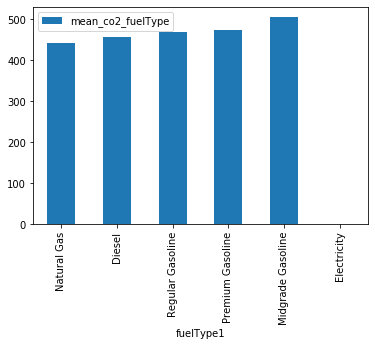

In [25]:
EDA6=df.groupby(["fuelType1"]).agg(mean_co2_fuelType=("co2TailpipeGpm","mean")).sort_values("mean_co2_fuelType")
EDA6=EDA6.reset_index()

EDA6.plot(kind='bar',y='mean_co2_fuelType',x='fuelType1')

# Which fuel type produces the best UCity?

Cars with Electricity fuel consumption have a significantly higher mean City MPG (UCity) compared to those using other types of fuel.

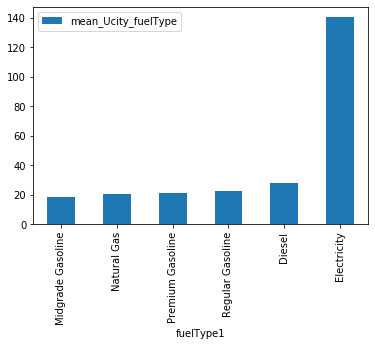

In [5]:

EDA7=df.groupby(["fuelType1"]).agg(mean_Ucity_fuelType=("UCity","mean")).sort_values("mean_Ucity_fuelType")
EDA7=EDA7.reset_index()

EDA7.plot(kind='bar',y='mean_Ucity_fuelType',x='fuelType1')


# Introduction to Building the Model

Based on the insights provided in the previous EDA section, I will use machine learning models to predict the value of UCity in this section. As we aim to predict the output of a continuous value, which is **UCity**, I choose a **regression model**. 

As we can see in Pairs Plots and VIF test, there is high collinearity and multicollinearity between our variables. To reduce overfitting, I propose to use **Ridge regression** to pull model towards simpler models with minimum bias (i.e. bias values towards 0).

*Note:*

Two approaches can be adopted to model this dataset. The first approach is to exclude variables, such as Comb08U and highway08U which are highly correlated with UCity, and only include relevant information related to cars and fuels. The second approach is to include all the available information. I pursue the first approach but will add more variables into the model only if I did not get the desired results. 

 To deal with Null data, we can either drop null fields or fill them with the mean value or imputation techniques. I prefer to drop all null fields to make the model simpler. If the model did not perform well, I will adopt imputation methods.

#### Assumptions about Data Cleaning for Model Building

Before building a model, the cleaned data from previous EDA section is further cleaned based on the assumption stated below: 

- Removing the UCity values which are 0 or greater than 200 (outliers)
- Removing all columns containing information on fuel type2 (column name contains A), since the majority of cars (more than 90%) are single fuel cars 
- Keeping the columns with more valuable data, comparing *unadjusted variable* and *variable* in our data, and keeping the one that contains more information
- Removing city08/city08U (City MPG for fuel type1) because of its exact similarity with UCity
- Removing variables with no business logic, such as ID and youSaveSpend
- Creating a new variable, called **type**, which contains information on the type of the cars ('single_fuel', 'dual_fuel')



In [10]:

# prepare data again in case you just want to run Modeling
# read data
df=pd.read_csv("vehicles.csv")

# added variable type
df['type'] = np.where(df['fuelType2'].isnull(), 'single_fuel', 'dual_fuel')

#remove columns for dual fuel cars
df2 = df.filter(regex ='A')
columns=df2.columns
df=df.drop(columns=columns)

#replace 0 with nan
df=df.replace({'0': np.nan, 0: np.nan})

#remove column contain 80% null
df=df[df.columns[df.isnull().mean() < 0.8]]

#replace -1 with Null
cols_co2=["co2","co2TailpipeGpm","feScore","ghgScore"]
df[cols_co2]=df[cols_co2].replace({-1:np.nan})

df=df[df["UCity"]<200]
df_copy=df.copy()

#remove some of unnecessary columns
df_rem=df.drop(columns=["city08","city08U","co2","comb08","comb08U","engId","eng_dscr",
                        "fuelType1","highway08","id","model","make","youSaveSpend",'trans_dscr',
                        "createdOn","modifiedOn","mpgData","trany","mfrCode","highway08U","UHighway"])

#To keep this project simple drop rows contain NA
df_rem.dropna(inplace=True)


print('MPG data set after cleaning has {} rows and {} columns'.format(df_rem.shape[0], df_rem.shape[1]))

MPG data set after cleaning has 2917 rows and 16 columns


In [11]:
df_rem.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
barrels08,2917.0,13.637884,3.238249,0.06,11.365862,13.1844,15.695714,25.354615
co2TailpipeGpm,2917.0,367.341447,86.667802,29.00,309.000000,360.0000,422.000000,692.000000
cylinders,2917.0,5.272540,1.688167,2.00,4.000000,4.0000,6.000000,12.000000
displ,2917.0,2.835413,1.210155,0.60,2.000000,2.5000,3.500000,6.800000
feScore,2917.0,5.816935,1.698890,1.00,5.000000,6.0000,7.000000,10.000000
fuelCost08,2917.0,1960.901611,562.031188,800.00,1500.000000,1900.0000,2350.000000,3950.000000
ghgScore,2917.0,5.808365,1.700871,1.00,5.000000,6.0000,7.000000,10.000000
lv4,2917.0,15.681865,5.402927,2.00,13.000000,15.0000,16.000000,47.000000
pv4,2917.0,98.487830,7.659614,48.00,94.000000,98.0000,103.000000,128.000000
UCity,2917.0,28.802417,8.881256,12.90,22.700000,27.4000,33.400000,79.992000


# Pairs Plot

This plot allows us to see both distribution of single variables and relationships between two variables. Pair plots are a great method to identify trends. 

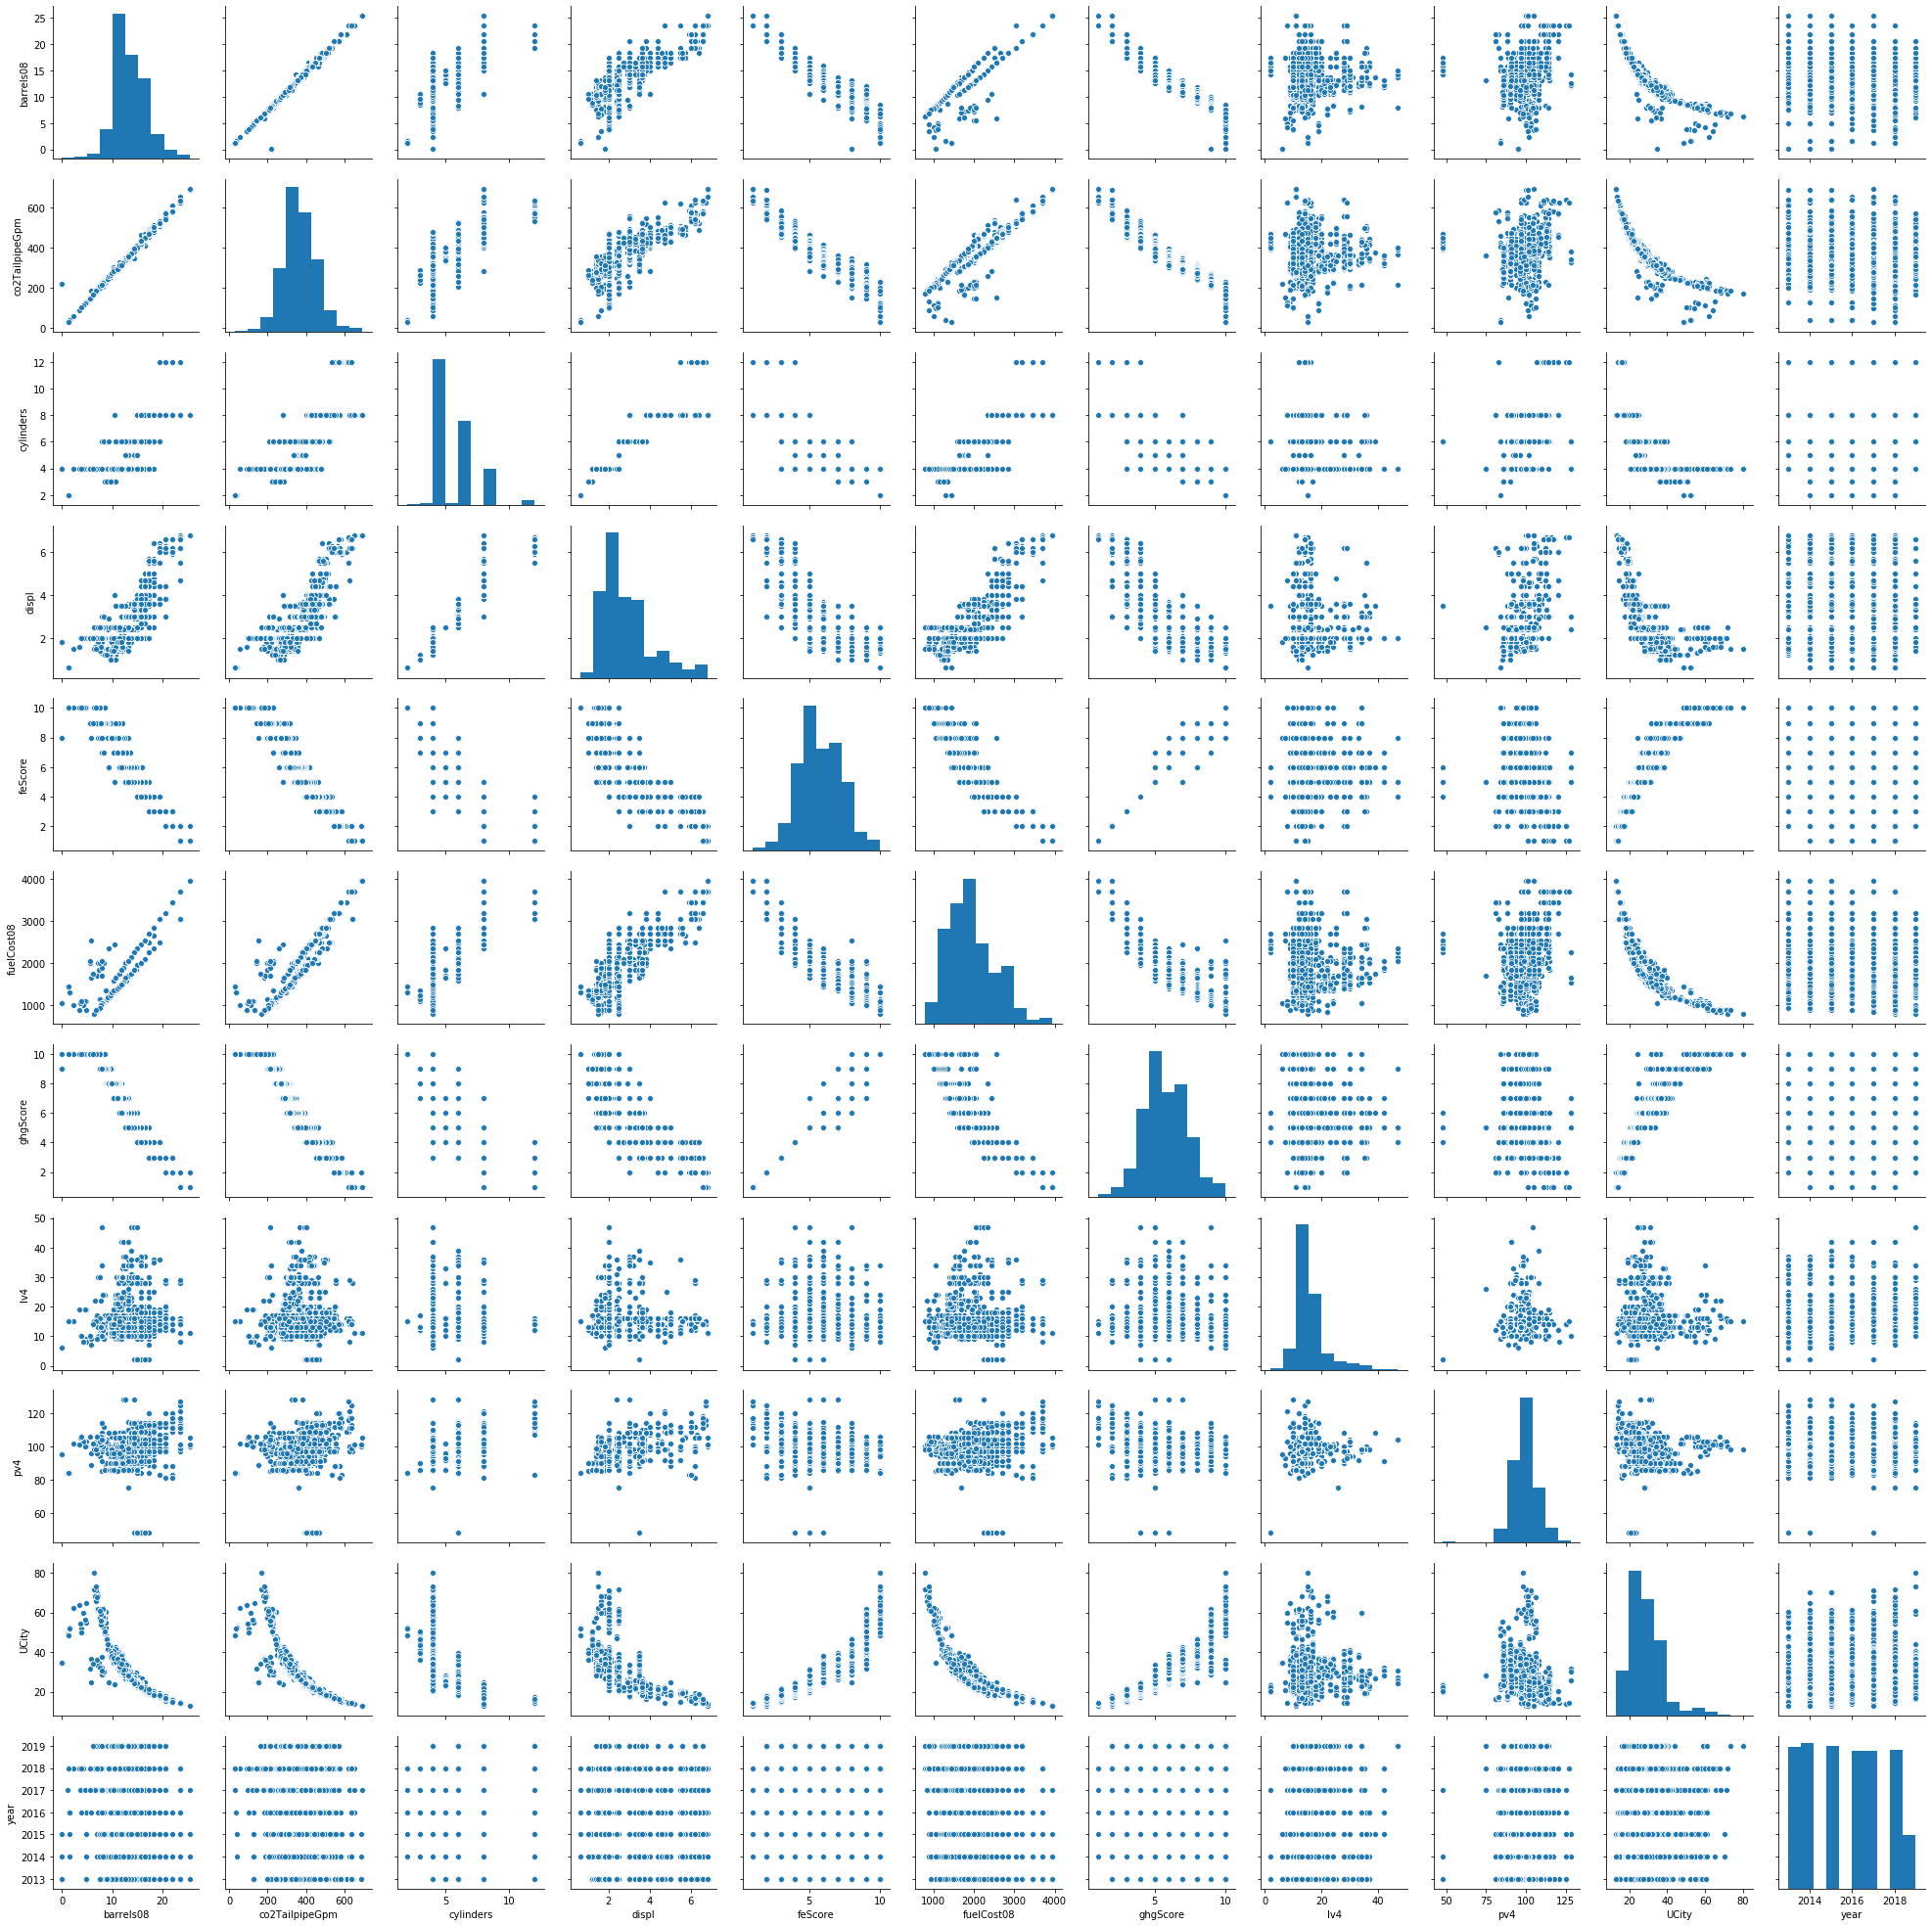

In [12]:
sns.pairplot(df_rem)

As we can see, **UCity** is highly correlated with many of variables, such as **co2TailpipeGpm** and **barrels08**. Many of the variables are also highly correlated with each other, meaning that there is multicollinearity in our dataset.I will test multicollinearity in VIF test part. From the histograms, we can see that the variables **UCity**, **lv4**, and **displ** are heavily right-skewed. To better show these variables and make highly skewed distributions less skewed, we can transform these columns by taking the logarithm of the values.

In [21]:
df_rem['UCity'] = np.log10(df_rem['UCity'])
df_rem['lv4'] = np.log10(df_rem['lv4'])
df_rem['displ'] = np.log10(df_rem['displ'])
#sns.pairplot(df_rem)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


# VIF test

Colinearity is the state where two variables are highly correlated and contain similiar information about the variance within a given dataset. Multicolinearity on the other hand is more troublesome to detect because it emerges when three or more variables, which are highly correlated, are included within a model.The Variance Inflation Factor (VIF) is a measure of colinearity among predictor variables within a multiple regression.

In [14]:
#Imports
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# make a list with all the unique 'drive' from the data set
drive_code = list(set(df_rem["drive"].unique()))
fuelType_code = list(set(df_rem["fuelType"].unique()))
VClass_code = list(set(df_rem["VClass"].unique()))
startStop_code = list(set(df_rem["startStop"].unique()))
type_code = list(set(df_rem["type"].unique()))

# create a dictionary numerating the titles
drive_map = dict(zip(drive_code, np.arange(len(drive_code))))
fuelType_map = dict(zip( fuelType_code,np.arange(len(fuelType_code))))
VClass_map = dict(zip(VClass_code, np.arange(len(VClass_code))))
startStop_map = dict(zip( startStop_code,np.arange(len(startStop_code))))
type1_map = dict(zip(type_code,np.arange(len(type_code))))

# replace the text titles with the number titles from the dict
df_rem["drive"] = df_rem["drive"].map(drive_map)
df_rem['fuelType'] = df_rem['fuelType'].map(fuelType_map)
df_rem['VClass'] = df_rem['VClass'].map(VClass_map)
df_rem['startStop'] = df_rem['startStop'].map(startStop_map)
df_rem['type'] = df_rem['type'].map(type1_map)


df_vif=df_rem.copy()

df_vif=df_vif.drop(columns=["UCity"])
#Calculate VIF
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]
vif["features"] = df_vif.columns

vif

,VIF Factor,features
0,2064.229535,barrels08
1,2070.531889,co2TailpipeGpm
2,78.599979,cylinders
3,46.419030,displ
4,7.755048,drive
5,1250.303638,feScore
6,307.075883,fuelCost08
7,7.373761,fuelType
8,1320.202379,ghgScore
9,96.601219,lv4


As expected, the VIF factors for **co2TailpipeGpm**, **barrels08**, **ghgScore**, **feScore**, and **year** are very high. They have a high variance inflation factor because they explain the same variance within this dataset. We would need to discard one of these variables before starting building a model and to use Ridge model to consider high multicollinearity in the model.

# Convert Categorical Variables to One Hot Encoding (Dummy Variables)

There are many methods to deal with the categorical variable in the regression. The simplest one is encoding to ordinal variables already used for cylinders.

Because **One hot encoding** is a method that takes each category value and turns it into a binary vector where all columns are equal to zero besides the category column, I decided to choose this method to encode each category.


In [16]:
df_rem_onehot = df_rem.copy()
df_rem_onehot = pd.get_dummies(df_rem_onehot, columns=["drive","fuelType","VClass","startStop","type"],
                               prefix = ["drive","fuelType","VClass","startStop","type"])

# Building the Model

To build the model, sixth steps will be taken: I will split the data into the train and test datasets, fit **Ridge** regression, **Normalize** the data, find the alpha with the best results for Ridge regression, introduce polynomial Ridge regression, and, finally, validate the model by the CV method. 


In [17]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

#remove columns with high VIF
X=df_rem_onehot.drop(columns=["UCity","co2TailpipeGpm","feScore"])
y=df_rem_onehot["UCity"]

#Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#Ridge Model
linridge = Ridge(alpha=1).fit(X_train, y_train)

print('MPG dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

MPG dataset
ridge regression linear model intercept: -12.757112782041414
ridge regression linear model coeff:
[-2.12876547e-02  5.00854378e-03 -1.07102917e-02  1.31469047e-06
  3.40321437e-02 -3.39436026e-02  1.70902196e-04  7.06489437e-03
  0.00000000e+00  5.63907403e-04  1.21707423e-04  3.58274962e-04
 -8.17703617e-03  7.13314638e-03  3.93373566e-02  6.72636337e-02
  9.75814974e-02 -1.99177550e-01  2.92675511e-02  6.39478470e-02
  2.50142814e-02 -1.15790532e-01  4.36537814e-02  3.47242449e-02
 -8.58221115e-02 -9.16029066e-03  7.77807424e-03 -4.25706142e-03
  5.38058313e-03 -1.46103698e-02 -1.28914566e-02  3.07653151e-02
 -3.57876592e-02 -1.87100039e-03  9.84095013e-03  1.72945188e-02
  7.51839671e-03 -5.13485482e-03  5.13485482e-03  1.61193307e-02
 -1.61193307e-02]
R-squared score (training): 0.959
R-squared score (test): 0.955
Number of non-zero features: 40


As you can see, **R-squared score* is **0.959** for the train data and **0.955** for the test data respectively. The model performs very well. This is similar to what I expected in the EDA section where there was a high correlation between some of the features and the target variable. The regression model presents 95.9% of the variance in train data. Since the R-squared score for the test is very close to the train data, I conclude that the model performs well.

As we know Ridge regression is very sensitive to the scale of data. As in our data set the scales of variables are different, we need to normalize our data to have a more accurate prediction. I apply a form of normalization called **MinMax Scaling**, which will transform variables, so they're all on the same scale between zero and one. To do this, we compute the minimum and maximum values for each feature on our data. However, normalization does not help us improve model accuracy in this case.


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=1).fit(X_train_scaled, y_train)

print('MPG dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
    .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

MPG dataset
ridge regression linear model intercept: 1.4399359071606652
ridge regression linear model coeff:
[-2.55092937e-01  4.32553214e-02 -2.34546593e-02 -1.83557669e-01
  3.26427751e-01 -4.81762580e-02  1.97511600e-02  4.54640382e-02
  0.00000000e+00 -2.85149303e-03 -2.22176250e-03 -1.75360480e-03
  2.60813970e-04  6.56604637e-03  3.67699811e-02  3.19399672e-02
  7.32935273e-02 -1.44275629e-01 -5.02139863e-05  5.08222580e-02
  3.60459898e-02 -8.59125875e-02  1.97739377e-02  2.51231599e-02
 -4.35303902e-02 -7.65150078e-03  9.05145794e-03 -6.09526934e-03
  1.20913850e-03 -1.30957576e-02 -1.30792800e-02  3.16495403e-02
 -3.17579435e-02  2.28311241e-03  1.01358323e-03  1.90936923e-02
  7.37922659e-03 -6.15896259e-03  6.15896259e-03  1.06849767e-02
 -1.06849767e-02]
R-squared score (training): 0.956
R-squared score (test): 0.954
Number of non-zero features: 40


In [19]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [1,5, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 1.00
num abs(coeff) > 1.0: 0, r-squared training: 0.96, r-squared test: 0.95

Alpha = 5.00
num abs(coeff) > 1.0: 0, r-squared training: 0.95, r-squared test: 0.95

Alpha = 10.00
num abs(coeff) > 1.0: 0, r-squared training: 0.94, r-squared test: 0.94

Alpha = 20.00
num abs(coeff) > 1.0: 0, r-squared training: 0.92, r-squared test: 0.93

Alpha = 50.00
num abs(coeff) > 1.0: 0, r-squared training: 0.89, r-squared test: 0.89

Alpha = 100.00
num abs(coeff) > 1.0: 0, r-squared training: 0.84, r-squared test: 0.84

Alpha = 1000.00
num abs(coeff) > 1.0: 0, r-squared training: 0.54, r-squared test: 0.55



As you can see, we will get different accuracy in our model by changing the alpha. The best R-squared value on the test set is achieved with an alpha setting of 1. The larger alpha becomes, the worse model fits.


As we saw in the pair plot, we can say that some variables, such as barrels08 and Ucity, are in a curvilinear relationship. Thus, we use non-linear regression i.e Polynomial Regression. We transform the original input data to add polynomial features up to degree 2. Adding of many polynomial features often leads to overfitting, so we often use polynomial features in combination with the regression that has a regularization penalty such as Ridge regression.

In [382]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y,
                                                   random_state = 0)

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y,
                                                   random_state = 0)
linreg = Ridge().fit(X_train, y_train)

#print('(poly deg 2 + ridge) linear model coeff (w):\n{}'
 #    .format(linreg.coef_))
#print('(poly deg 2 + ridge) linear model intercept (b): {:.3f}'
 #    .format(linreg.intercept_))
print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))
print('Cross-validation (accuracy)', cross_val_score(linreg, X_F1_poly, y, cv=10))


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.39762e-17): result may not be accurate.
  overwrite_a=True).T
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.74353e-17): result may not be accurate.
  overwrite_a=True).T
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.77825e-17): result may not be accurate.
  overwrite_a=True).T
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.85042e-17): result may not be accurate.
  overwrite_a=True).T


(poly deg 2 + ridge) R-squared score (training): 0.991
(poly deg 2 + ridge) R-squared score (test): 0.962


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.78795e-17): result may not be accurate.
  overwrite_a=True).T
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.78668e-17): result may not be accurate.
  overwrite_a=True).T
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.7513e-17): result may not be accurate.
  overwrite_a=True).T


Cross-validation (accuracy) [0.97151506 0.9741545  0.99004338 0.98901793 0.99159516 0.99135849
 0.99037135 0.98889939 0.88808513 0.85562253]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.75829e-17): result may not be accurate.
  overwrite_a=True).T
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.78725e-17): result may not be accurate.
  overwrite_a=True).T
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.89241e-17): result may not be accurate.
  overwrite_a=True).T
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.81515e-17): result may not be accurate.
  overwrite_a=True).T


We had a slight improvement in our R-squares but the difference between the test and train R-squares score became bigger. This might be a reason behind overfitting the model.

We used 10-fold cross-validation to create 10 random train-test splits, where the evaluation metric was averaged across splits. This leads to models that are more reliable on unseen data. In particular, we can also use a grid search method within each cross-validation fold to find optimal parameters (i.e alpha) for a model with respect to the evaluation metric.